#**Churn Prediction**

##**Importing Modules**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##**Reading Data**

In [2]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/churn_prediction.csv")
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


##**Data Exploration**

In [3]:
print(df.shape)
df.dtypes


(28382, 21)


customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

###**Univariate Analysis**

####*Continuos Variables*

In [4]:
print(df.shape)
df.describe()

(28382, 21)


,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


#####remaning

*   average_monthly_balance_prevQ2
*   current_month_credit
*   previous_month_credit
*   current_month_debit 
*  	previous_month_debit 
*  	current_month_balance
*  	previous_month_balance



In [5]:
#same as below

#####average_monthly_balance_prevQ

In [6]:
#same as below

27801


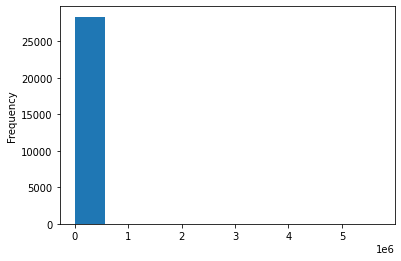

In [7]:
i="average_monthly_balance_prevQ"
print(df[i].nunique())
df[i].plot.hist()

#####previous_month_end_balance

In [8]:
#outlier or rightskwed
#remove data less than 0

27922


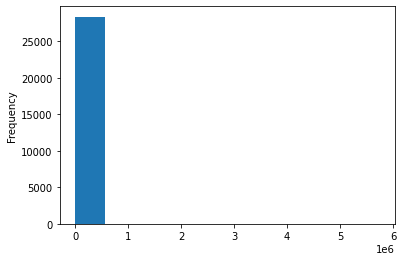

In [9]:
i="previous_month_end_balance"
print(df[i].nunique())
df[i].plot.hist()

#####current_balance

In [10]:
#outliers ...or ....right skewed
#remove less than 0

27903


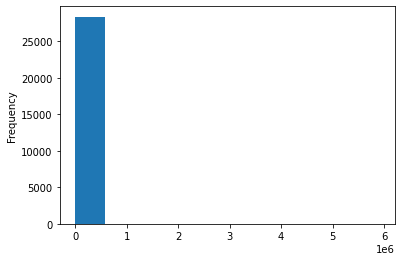

In [11]:
i="current_balance"
print(df[i].nunique())
df[i].plot.hist()

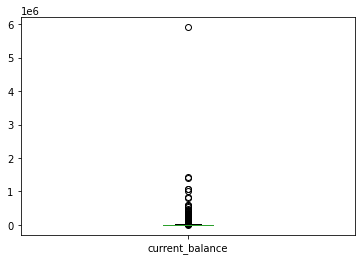

In [12]:
df[i].plot.box()

#####days_since_last_transaction

In [13]:
#missing values
#right skewd

360


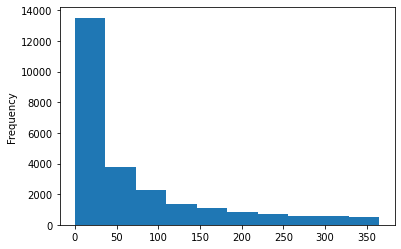

In [14]:
i="days_since_last_transaction"
print(df[i].nunique())
df[i].plot.hist()

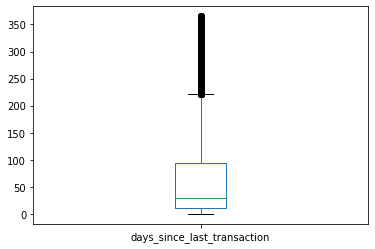

In [15]:
df[i].plot.box()

#####branch_code

In [16]:
#cat with 3000 classses ...cant do anything

3185


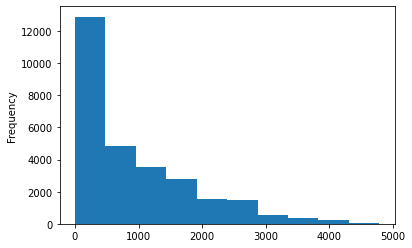

In [17]:
i="branch_code"
print(df[i].nunique())
df[i].plot.hist()

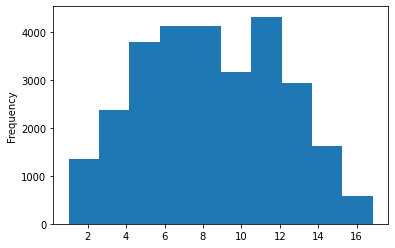

In [18]:
(np.power(df['branch_code'],1/3)).plot.hist()

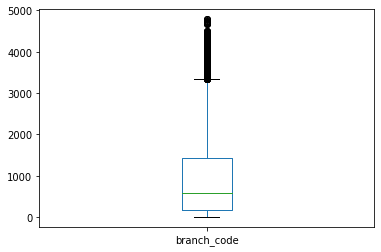

In [19]:
df[i].plot.box()

#####customer_nw_category

In [20]:
#it is a categorical variable

3


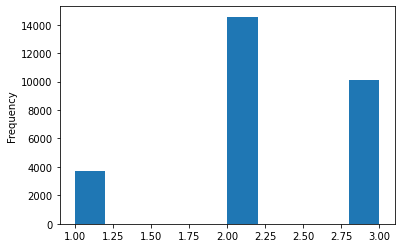

In [21]:
i="customer_nw_category"
print(df[i].nunique())
df[i].plot.hist()

#####city

In [22]:
#missing values(can use branch code i think)
#it is categorical data ....but has 1600 cats...try to drop this

1604


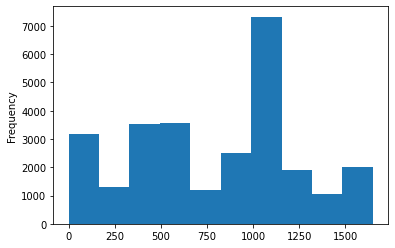

In [23]:
i="city"
print(df[i].nunique())
df[i].plot.hist()

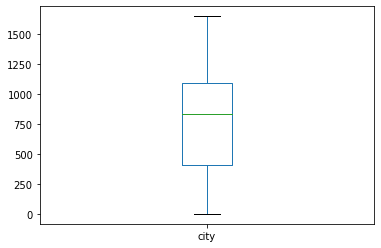

In [24]:
df[i].plot.box()

#####dependents

In [25]:
#this is a categorial data

15


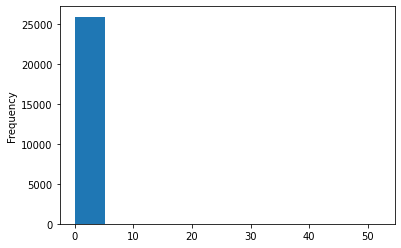

In [26]:
i="dependents"
print(df[i].nunique())
df[i].plot.hist()

#####age

In [27]:
#perfect

90


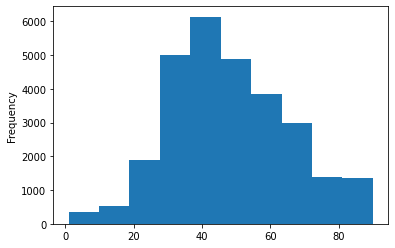

In [28]:
i="age"
print(df[i].nunique())
df[i].plot.hist()

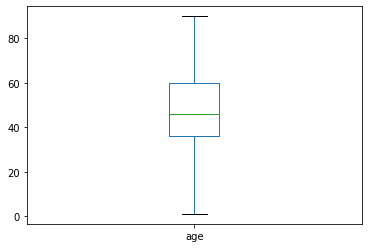

In [29]:
df[i].plot.box()

#####vintage

In [30]:
#right skewed
#try to remove data above 7500

5473


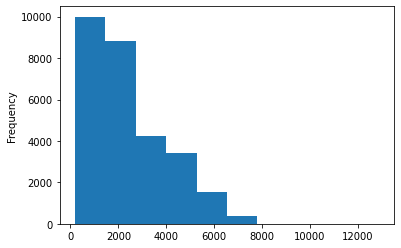

In [31]:
i="vintage"
print(df[i].nunique())
df[i].plot.hist()

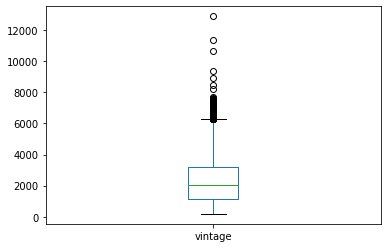

In [32]:
df[i].plot.box()

#####customer_id

In [33]:
#remove this

28382


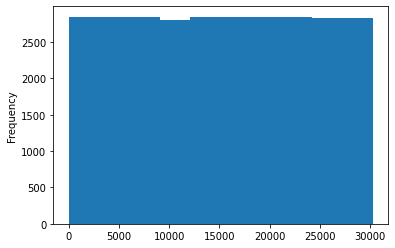

In [34]:
i="customer_id"
print(df[i].nunique())
df[i].plot.hist()

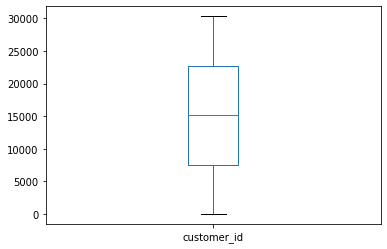

In [35]:
df[i].plot.box()

####*Categorical Variables*

In [36]:
print(df.shape)
df.describe(include="all")

(28382, 21)


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


#####customer_nw_category

In [37]:
#just change to object(swap 3 <-> 1)

    freq      freq%
2  14559  51.296596
3  10112  35.628215
1   3711  13.075188


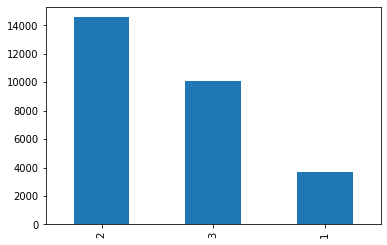

In [38]:
i="customer_nw_category"
temp=pd.DataFrame(index=df[i].value_counts().index)
temp["freq"]=df[i].value_counts()
temp["freq%"]=df[i].value_counts(normalize=True)*100
print(temp)
df[i].value_counts().plot.bar()

#####occupation

In [39]:
#missing

                freq      freq%
self_employed  17476  61.748286
salaried        6704  23.687372
student         2058   7.271571
retired         2024   7.151438
company           40   0.141333


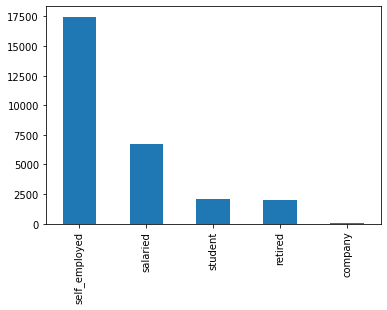

In [40]:
i="occupation"
temp=pd.DataFrame(index=df[i].value_counts().index)
temp["freq"]=df[i].value_counts()
temp["freq%"]=df[i].value_counts(normalize=True)*100
print(temp)
df[i].value_counts().plot.bar()

#####dependents

In [41]:
#missing values
#outliers...change above 3 to 3

       freq      freq%
0.0   21435  82.699950
2.0    2150   8.295073
1.0    1395   5.382152
3.0     701   2.704580
4.0     179   0.690613
5.0      41   0.158185
6.0       8   0.030865
7.0       3   0.011575
36.0      1   0.003858
52.0      1   0.003858
25.0      1   0.003858
9.0       1   0.003858
50.0      1   0.003858
32.0      1   0.003858
8.0       1   0.003858


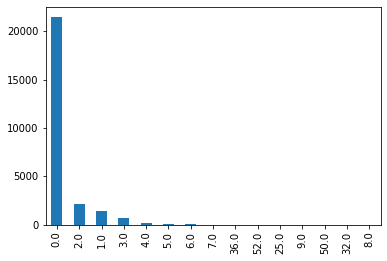

In [42]:
i="dependents"
temp=pd.DataFrame(index=df[i].value_counts().index)
temp["freq"]=df[i].value_counts()
temp["freq%"]=df[i].value_counts(normalize=True)*100
print(temp)
df[i].value_counts().plot.bar()

#####gender

In [43]:
#missing

         freq      freq%
Male    16548  59.403382
Female  11309  40.596618


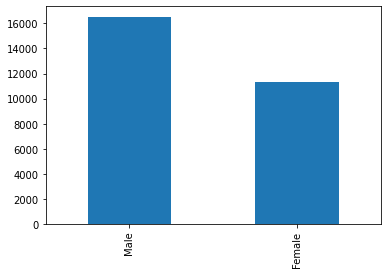

In [44]:
i="gender"
temp=pd.DataFrame(index=df[i].value_counts().index)
temp["freq"]=df[i].value_counts()
temp["freq%"]=df[i].value_counts(normalize=True)*100
print(temp)
df[i].value_counts().plot.bar()

##**Data Transformation  and Manipulation**

###**Missing Values**

In [45]:
print(df.shape)
df.describe(include="all")

(28382, 21)


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [46]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

#####days_since_last_trans

In [47]:
df['days_since_last_transaction'].fillna(df['days_since_last_transaction'].mean(),inplace=True)

#####city

In [48]:
# def fun(x):
#   print(df[df['branch_code']== x['branch_code']]['city'].mode()[0])
#   return df[df['branch_code']== x['branch_code']]['city'].mode()[0]
# t=df.apply(lambda x:fun(x) if x['city'].isnull() else x['city'],axis=1)
# df['city']

In [49]:
# df['city'].fillna(value=(df[df['branch_code']== x['branch_code']]['city'].mode()[0]),inplace=True)

In [50]:
df['city'].fillna(df['city'].mode()[0],inplace=True)

#####occupation

In [51]:
pd.crosstab(df['age'],df['occupation'])
#df.pivot_table(values="age",index='gender',columns='occupation')

occupation,company,retired,salaried,self_employed,student
age,,,,,
1,0,0,0,2,2
2,0,0,0,0,17
3,0,0,0,2,32
4,0,0,0,0,34
5,0,0,0,1,40
...,...,...,...,...,...
86,0,25,2,17,0
87,0,20,1,13,0
88,0,15,0,5,0


In [52]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)

#####gender

In [53]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

#####dependents

In [54]:
df.pivot_table(values="dependents",index='gender',columns='age',aggfunc='mean')

age,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.017857,0.016393,0.00,0.040404,0.036364,0.062500,0.07483,0.101266,0.052632,0.117347,0.102564,0.070588,0.108434,0.129707,0.131673,0.113636,0.111111,0.119691,0.092784,...,0.200000,0.185792,0.171429,0.138462,0.222222,0.135294,0.154362,0.151163,0.102564,0.128571,0.198718,0.158940,0.124138,0.097403,0.160000,0.183673,0.146552,0.090909,0.058824,0.072000,0.060606,0.022472,0.041096,0.000000,0.107143,0.000000,0.040000,0.100000,0.020000,0.057143,0.031250,0.00000,0.000000,0.043478,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000
Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019608,0.046512,0.019608,0.08,0.126866,0.165680,0.194872,0.21256,0.222222,0.421053,0.342857,0.404762,0.409639,0.432353,0.464174,0.491124,0.562500,0.602703,0.612466,0.576000,...,0.784566,0.814433,0.737226,0.840149,0.686192,0.653153,0.723140,0.802469,0.736111,0.582996,0.492958,0.422481,0.488263,0.473077,0.509615,0.345794,0.413043,0.288770,0.316667,0.387879,0.314465,0.275641,0.256000,0.338235,0.219048,0.218391,0.182796,0.078947,0.145161,0.084507,0.102941,0.02439,0.027778,0.047619,0.166667,0.178571,0.000000,0.083333,0.058824,0.003063


In [55]:
df['dependents'].fillna(df['dependents'].mode()[0],inplace=True)

In [56]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

###**Outliers and transformation**

####*Categorical*

#####customer_nw_category

In [57]:
df["customer_nw_category"].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [58]:
df['customer_nw_category'].replace({1:3,3:1},inplace=True)
df["customer_nw_category"].value_counts()##since given 1:high 2:med 3:low....hence making it 1:low 3:high

2    14559
1    10112
3     3711
Name: customer_nw_category, dtype: int64

#####dependents

In [59]:
df['dependents'].value_counts(normalize=True)*100

0.0     84.201254
2.0      7.575224
1.0      4.915087
3.0      2.469875
4.0      0.630681
5.0      0.144458
6.0      0.028187
7.0      0.010570
36.0     0.003523
52.0     0.003523
25.0     0.003523
9.0      0.003523
50.0     0.003523
32.0     0.003523
8.0      0.003523
Name: dependents, dtype: float64

In [60]:
df.loc[df['dependents']>3,'dependents']=3
df['dependents'].value_counts(normalize=True)*100

0.0    84.201254
2.0     7.575224
1.0     4.915087
3.0     3.308435
Name: dependents, dtype: float64

####*Continuos*

In [61]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.299908,802.444014,1.774470,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.748327,428.316238,0.660443,937.799129,81.290871,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,1.000000,176.000000,13.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,879.000000,2.000000,572.000000,41.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,2.000000,1440.000000,83.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,3.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


#####previous_month_balance

count    2.838200e+04
mean     7.495539e+03
std      4.243190e+04
min      0.000000e+00
25%      2.074408e+03
50%      3.465235e+03
75%      6.654693e+03
max      5.720144e+06
Name: previous_month_balance, dtype: float64

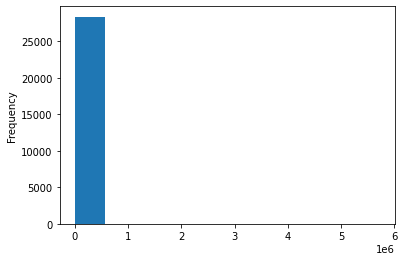

In [62]:
i="previous_month_balance"
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27246
True      1136
Name: previous_month_balance, dtype: int64


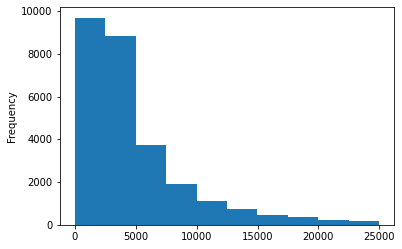

In [63]:
print((df[i]>25000).value_counts())
(df[df[i]<25000][i]).plot.hist()

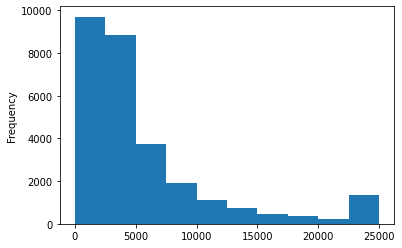

In [64]:
df.loc[df[i]>25000,i]=25000
(df[i]).plot.hist()

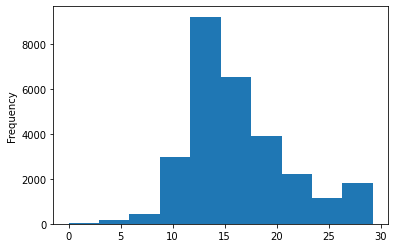

In [65]:
np.power(df[i],1/3).plot.hist()

In [66]:
df[i]=np.power(df[i],1/3)

#####current_month_balance

count    2.838200e+04
mean     7.451460e+03
std      4.203387e+04
min      0.000000e+00
25%      1.996765e+03
50%      3.447995e+03
75%      6.667958e+03
max      5.778185e+06
Name: current_month_balance, dtype: float64

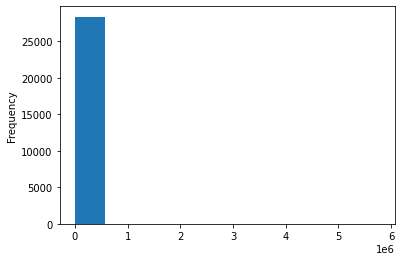

In [67]:
i="current_month_balance"
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27275
True      1107
Name: current_month_balance, dtype: int64


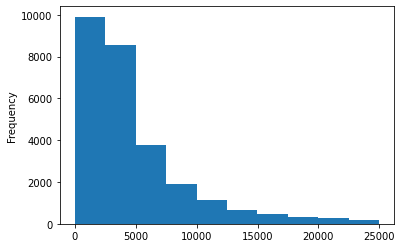

In [68]:
print((df[i]>25000).value_counts())
(df[df[i]<25000][i]).plot.hist()

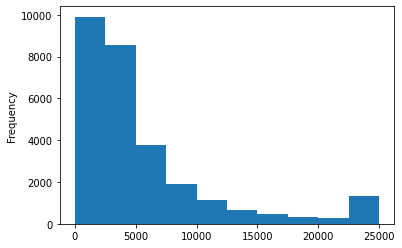

In [69]:
df.loc[df[i]>25000,i]=25000
(df[i]).plot.hist()

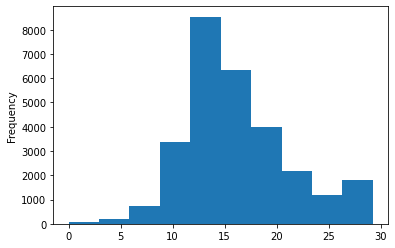

In [70]:
np.power(df[i],1/3).plot.hist()

In [71]:
df[i]=np.power(df[i],1/3)

#####previous_month_debit

count    2.838200e+04
mean     3.339761e+03
std      2.430111e+04
min      1.000000e-02
25%      4.100000e-01
50%      1.099600e+02
75%      1.357553e+03
max      1.414168e+06
Name: previous_month_debit, dtype: float64

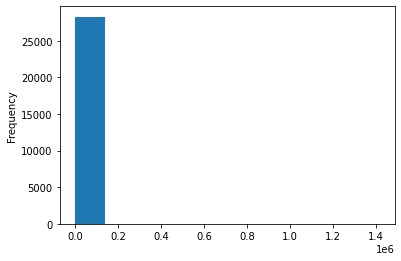

In [72]:
i="previous_month_debit"
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27275
True      1107
Name: previous_month_debit, dtype: int64


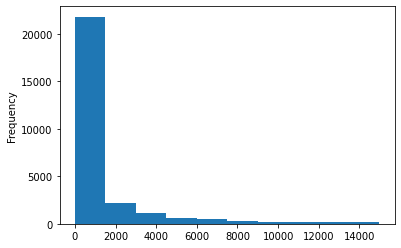

In [73]:
print((df[i]>15000).value_counts())
(df[df[i]<15000][i]).plot.hist()

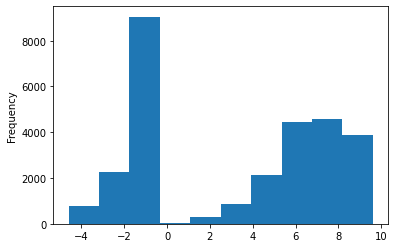

In [235]:
df.loc[df[i]>15000,i]=15000
np.log(df[i]).plot.hist()

#####current_month_debit

count    2.838200e+04
mean     3.658745e+03
std      5.198542e+04
min      1.000000e-02
25%      4.100000e-01
50%      9.193000e+01
75%      1.360435e+03
max      7.637857e+06
Name: current_month_debit, dtype: float64

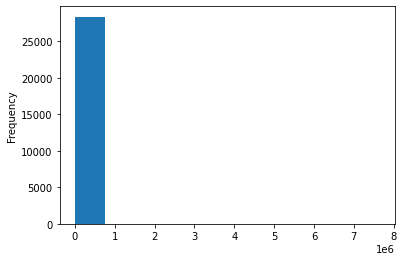

In [75]:
i="current_month_debit"
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27291
True      1091
Name: current_month_debit, dtype: int64


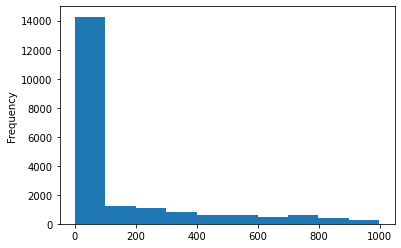

In [76]:
print((df[i]>15000).value_counts())
(df[df[i]<1000][i]).plot.hist()

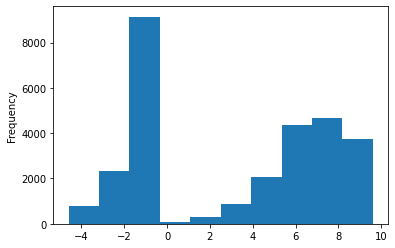

In [77]:
df.loc[df[i]>15000,i]=15000
np.log(df[i]).plot.hist()

#####previous_month_credit

count    2.838200e+04
mean     3.261694e+03
std      2.968889e+04
min      1.000000e-02
25%      3.300000e-01
50%      6.300000e-01
75%      7.492350e+02
max      2.361808e+06
Name: previous_month_credit, dtype: float64

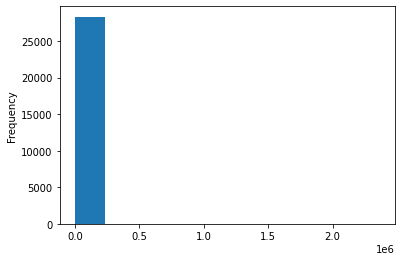

In [78]:
i="previous_month_credit"
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27360
True      1022
Name: previous_month_credit, dtype: int64


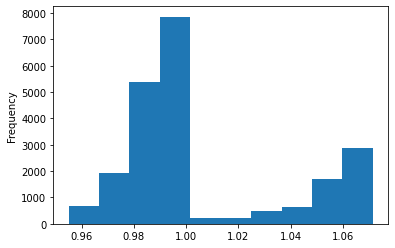

In [79]:
print((df[i]>15000).value_counts())
np.power(df[df[i]<1000][i],1/100).plot.hist()

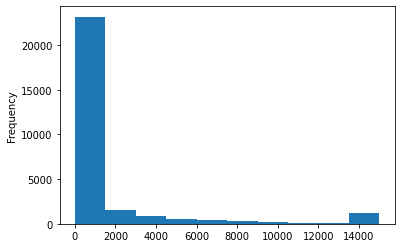

In [80]:
df.loc[df[i]>15000,i]=15000
(df[i]).plot.hist()

#####current_month_credit

count    2.838200e+04
mean     3.433252e+03
std      7.707145e+04
min      1.000000e-02
25%      3.100000e-01
50%      6.100000e-01
75%      7.072725e+02
max      1.226985e+07
Name: current_month_credit, dtype: float64

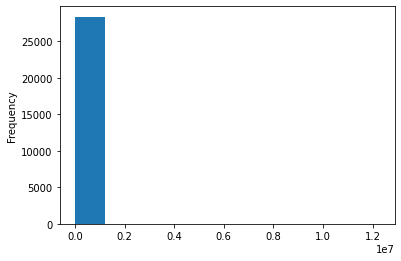

In [81]:
i="current_month_credit"
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    22276
True      6106
Name: current_month_credit, dtype: int64


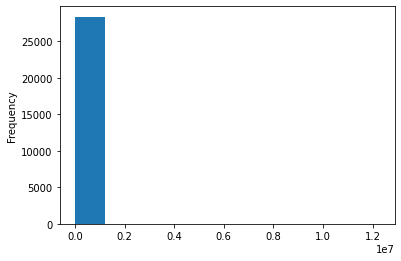

In [82]:
print((df[i]>1000).value_counts())
df[i].plot.hist()

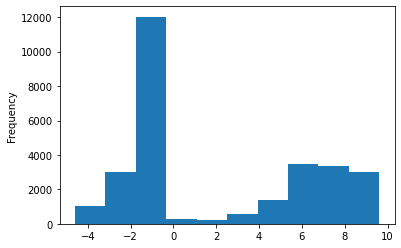

In [83]:
df.loc[df[i]>15000,i]=15000
np.log(df[i]).plot.hist()

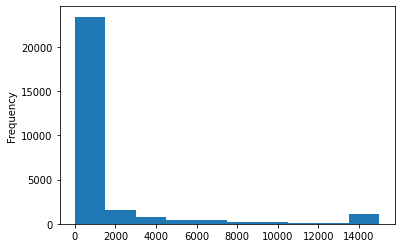

In [84]:
np.power(df[i],1/1).plot.hist()

#####average_monthly_balance_prevQ2

count    2.838200e+04
mean     7.127608e+03
std      4.457498e+04
min      0.000000e+00
25%      1.832507e+03
50%      3.359600e+03
75%      6.517960e+03
max      5.010170e+06
Name: average_monthly_balance_prevQ2, dtype: float64

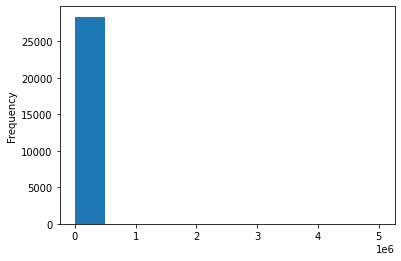

In [85]:
i="average_monthly_balance_prevQ2"
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27587
True       795
Name: average_monthly_balance_prevQ2, dtype: int64


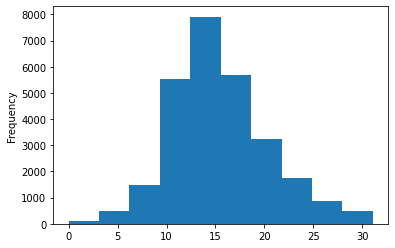

In [86]:
print((df[i]>30000).value_counts())
np.power(df[df[i]<30000][i],1/3).plot.hist()

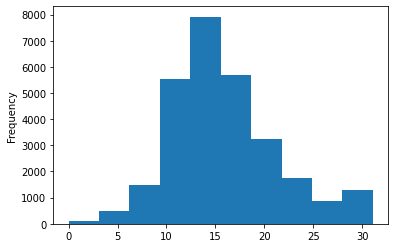

In [87]:
df.loc[df[i]>30000,i]=30000
(np.power(df[i],1/3)).plot.hist()

In [88]:
df[i]=np.power(df[i],1/3)

#####average_monthly_balance_prevQ

count    2.838200e+04
mean     7.496780e+03
std      4.172622e+04
min      1.428690e+03
25%      2.180945e+03
50%      3.542865e+03
75%      6.666887e+03
max      5.700290e+06
Name: average_monthly_balance_prevQ, dtype: float64

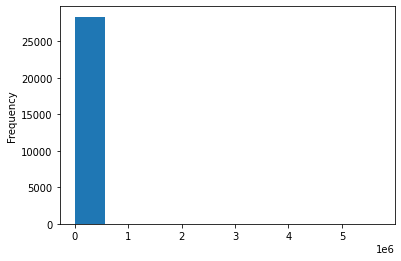

In [89]:
i='average_monthly_balance_prevQ'
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27542
True       840
Name: average_monthly_balance_prevQ, dtype: int64


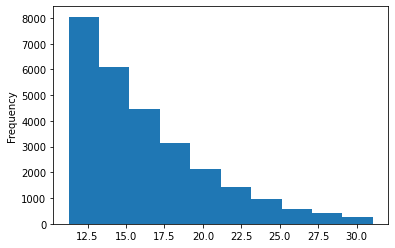

In [90]:
print((df[i]>30000).value_counts())
np.power(df[df[i]<30000][i],1/3).plot.hist()

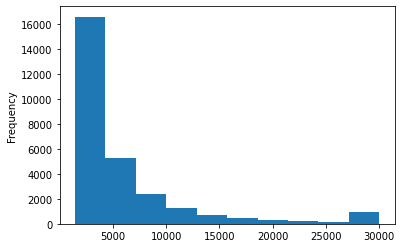

In [91]:
df.loc[df[i]>30000,i]=30000
((df[i])).plot.hist()

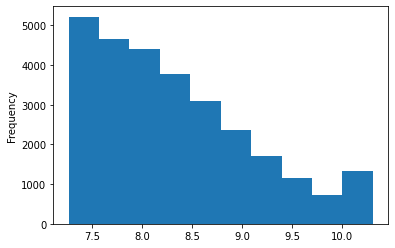

In [92]:
df[i]=np.log(df[i])
df[i].plot.hist()

#####previous_month_end_balance

count    2.838200e+04
mean     7.496383e+03
std      4.252922e+04
min      0.000000e+00
25%      1.906000e+03
50%      3.379915e+03
75%      6.656535e+03
max      5.740439e+06
Name: previous_month_end_balance, dtype: float64

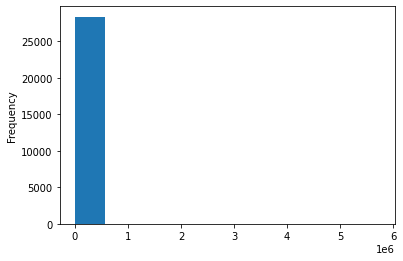

In [93]:
i='previous_month_end_balance'
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27512
True       870
Name: previous_month_end_balance, dtype: int64


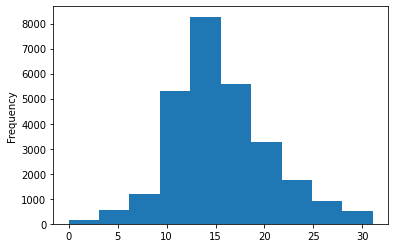

In [94]:
print((df[i]>30000).value_counts())
np.power(df[df[i]<30000][i],1/3).plot.hist()

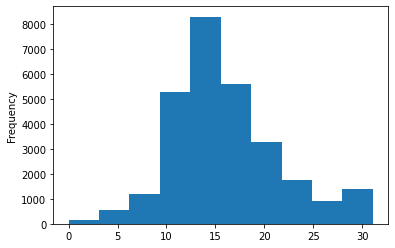

In [95]:
df.loc[df[i]>30000,i]=30000
np.power(df[i],1/3).plot.hist()

In [96]:
df[i]=np.power(df[i],1/3)

#####current_balance

count    2.838200e+04
mean     7.381755e+03
std      4.259845e+04
min      0.000000e+00
25%      1.784470e+03
50%      3.281255e+03
75%      6.635820e+03
max      5.905904e+06
Name: current_balance, dtype: float64

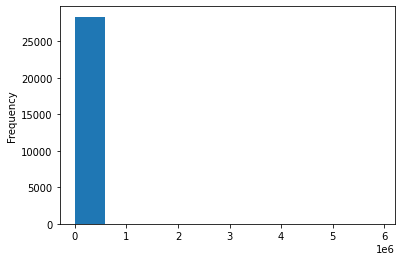

In [97]:
i='current_balance'
df.loc[df[i]<0,i]=0
df[i].plot.hist()
df[i].describe()

False    27515
True       867
Name: current_balance, dtype: int64


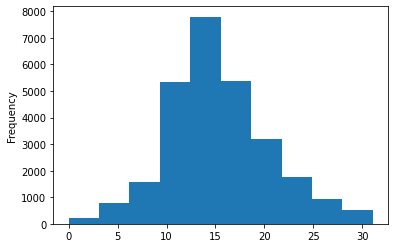

In [98]:
print((df[i]>30000).value_counts())
np.power(df[df[i]<30000][i],1/3).plot.hist()

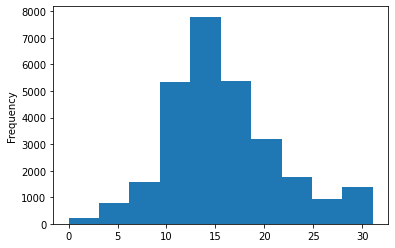

In [99]:
df.loc[df[i]>30000,i]=30000
np.power(df[i],1/3).plot.hist()

In [100]:
df[i]=np.power(df[i],1/3)

#####days_since_last_transaction

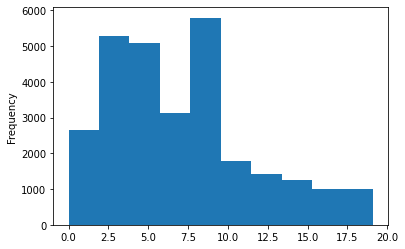

In [101]:
np.power(df['days_since_last_transaction'],1/2).plot.hist()

In [102]:
df['days_since_last_transaction']=np.power(df['days_since_last_transaction'],1/2)

#####vintage

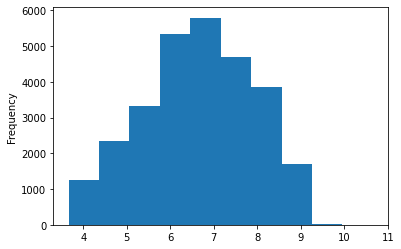

In [103]:
np.power(df['vintage'],1/4).plot.hist()

In [104]:
df['vintage'].describe()

count    28382.000000
mean      2364.336446
std       1610.124506
min        180.000000
25%       1121.000000
50%       2018.000000
75%       3176.000000
max      12899.000000
Name: vintage, dtype: float64

In [105]:
(df['vintage']>6000).value_counts()

False    27463
True       919
Name: vintage, dtype: int64

In [106]:
df.loc[df['vintage']>6000,'vintage']=6000
(df['vintage']>6000).value_counts()

False    28382
Name: vintage, dtype: int64

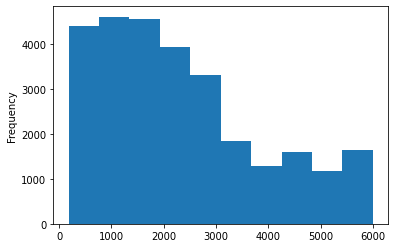

In [107]:
df['vintage'].plot.hist()

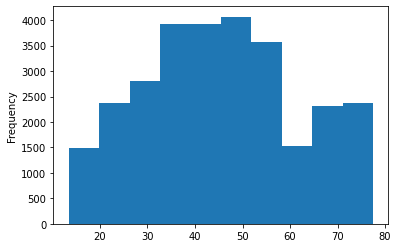

In [108]:
np.power(df['vintage'],1/2).plot.hist()

In [109]:
df['vintage']=np.power(df['vintage'],1/2)

In [110]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,15143.508667,45.588890,48.208336,0.299908,802.444014,1.774470,925.975019,7.039692,15.829072,16.054621,8.327272,15.906795,1343.685495,1417.277359,1670.805917,1699.267867,16.189432,16.320582,0.185329
std,8746.454456,16.391133,17.807163,0.748327,428.316238,0.660443,937.799129,4.521203,5.787278,5.574190,0.785073,5.496448,3342.964350,3410.765012,3562.184731,3592.059693,5.145699,4.995653,0.388571
min,1.000000,13.416408,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.264513,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,7557.250000,33.481338,36.000000,0.000000,409.000000,1.000000,176.000000,3.605551,12.129319,12.398647,7.687514,12.237196,0.310000,0.330000,0.410000,0.410000,12.592414,12.753558,0.000000
50%,15150.500000,44.922155,46.000000,0.000000,879.000000,2.000000,572.000000,6.403124,14.859812,15.007278,8.172691,14.977150,0.610000,0.630000,91.930000,109.960000,15.107370,15.132507,0.000000
75%,22706.750000,56.356011,60.000000,0.000000,1096.000000,2.000000,1440.000000,9.110434,18.791648,18.811181,8.804908,18.679729,707.272500,749.235000,1360.435000,1357.552500,18.821935,18.809446,0.000000
max,30301.000000,77.459667,90.000000,3.000000,1649.000000,3.000000,4782.000000,19.104973,31.072325,31.072325,10.308953,31.072325,15000.000000,15000.000000,15000.000000,15000.000000,29.240177,29.240177,1.000000


###**Encoding and datatype transforming**

####*Lable Encoding*

In [111]:
df.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382,28382.000000,28382,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,17073,NaN,17556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,45.588890,48.208336,NaN,0.299908,NaN,802.444014,1.774470,925.975019,7.039692,15.829072,16.054621,8.327272,15.906795,1343.685495,1417.277359,1670.805917,1699.267867,16.189432,16.320582,0.185329
std,8746.454456,16.391133,17.807163,NaN,0.748327,NaN,428.316238,0.660443,937.799129,4.521203,5.787278,5.574190,0.785073,5.496448,3342.964350,3410.765012,3562.184731,3592.059693,5.145699,4.995653,0.388571
min,1.000000,13.416408,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.264513,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,7557.250000,33.481338,36.000000,NaN,0.000000,NaN,409.000000,1.000000,176.000000,3.605551,12.129319,12.398647,7.687514,12.237196,0.310000,0.330000,0.410000,0.410000,12.592414,12.753558,0.000000
50%,15150.500000,44.922155,46.000000,NaN,0.000000,NaN,879.000000,2.000000,572.000000,6.403124,14.859812,15.007278,8.172691,14.977150,0.610000,0.630000,91.930000,109.960000,15.107370,15.132507,0.000000
75%,22706.750000,56.356011,60.000000,NaN,0.000000,NaN,1096.000000,2.000000,1440.000000,9.110434,18.791648,18.811181,8.804908,18.679729,707.272500,749.235000,1360.435000,1357.552500,18.821935,18.809446,0.000000


#####customer_nw_category

In [ ]:
#already ordinal just change to object

In [114]:
df['customer_nw_category'].value_counts()

2    14559
1    10112
3     3711
Name: customer_nw_category, dtype: int64

#####dependents

In [ ]:
#already  ordinal just change to object

In [113]:
df['dependents'].value_counts()

0.0    23898
2.0     2150
1.0     1395
3.0      939
Name: dependents, dtype: int64

####*One Hot Encoding*

In [116]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,15143.508667,45.588890,48.208336,0.299908,802.444014,1.774470,925.975019,7.039692,15.829072,16.054621,8.327272,15.906795,1343.685495,1417.277359,1670.805917,1699.267867,16.189432,16.320582,0.185329
std,8746.454456,16.391133,17.807163,0.748327,428.316238,0.660443,937.799129,4.521203,5.787278,5.574190,0.785073,5.496448,3342.964350,3410.765012,3562.184731,3592.059693,5.145699,4.995653,0.388571
min,1.000000,13.416408,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.264513,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,7557.250000,33.481338,36.000000,0.000000,409.000000,1.000000,176.000000,3.605551,12.129319,12.398647,7.687514,12.237196,0.310000,0.330000,0.410000,0.410000,12.592414,12.753558,0.000000
50%,15150.500000,44.922155,46.000000,0.000000,879.000000,2.000000,572.000000,6.403124,14.859812,15.007278,8.172691,14.977150,0.610000,0.630000,91.930000,109.960000,15.107370,15.132507,0.000000
75%,22706.750000,56.356011,60.000000,0.000000,1096.000000,2.000000,1440.000000,9.110434,18.791648,18.811181,8.804908,18.679729,707.272500,749.235000,1360.435000,1357.552500,18.821935,18.809446,0.000000
max,30301.000000,77.459667,90.000000,3.000000,1649.000000,3.000000,4782.000000,19.104973,31.072325,31.072325,10.308953,31.072325,15000.000000,15000.000000,15000.000000,15000.000000,29.240177,29.240177,1.000000


In [117]:
df.dtypes

customer_id                         int64
vintage                           float64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [119]:
pd.get_dummies(df).describe(include='all')

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,15143.508667,45.588890,48.208336,0.299908,802.444014,1.774470,925.975019,7.039692,15.829072,16.054621,8.327272,15.906795,1343.685495,1417.277359,1670.805917,1699.267867,16.189432,16.320582,0.185329,0.398457,0.601543,0.001409,0.071313,0.236206,0.618561,0.072511
std,8746.454456,16.391133,17.807163,0.748327,428.316238,0.660443,937.799129,4.521203,5.787278,5.574190,0.785073,5.496448,3342.964350,3410.765012,3562.184731,3592.059693,5.145699,4.995653,0.388571,0.489589,0.489589,0.037515,0.257351,0.424758,0.485748,0.259336
min,1.000000,13.416408,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.264513,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7557.250000,33.481338,36.000000,0.000000,409.000000,1.000000,176.000000,3.605551,12.129319,12.398647,7.687514,12.237196,0.310000,0.330000,0.410000,0.410000,12.592414,12.753558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15150.500000,44.922155,46.000000,0.000000,879.000000,2.000000,572.000000,6.403124,14.859812,15.007278,8.172691,14.977150,0.610000,0.630000,91.930000,109.960000,15.107370,15.132507,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,22706.750000,56.356011,60.000000,0.000000,1096.000000,2.000000,1440.000000,9.110434,18.791648,18.811181,8.804908,18.679729,707.272500,749.235000,1360.435000,1357.552500,18.821935,18.809446,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,30301.000000,77.459667,90.000000,3.000000,1649.000000,3.000000,4782.000000,19.104973,31.072325,31.072325,10.308953,31.072325,15000.000000,15000.000000,15000.000000,15000.000000,29.240177,29.240177,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
df=pd.get_dummies(df)

####*Changing Datatypes*

In [121]:
df.dtypes

customer_id                         int64
vintage                           float64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried               

In [122]:
df=df.astype({"dependents":"object","customer_nw_category":'object'})
df.dtypes

customer_id                         int64
vintage                           float64
age                                 int64
dependents                         object
city                              float64
customer_nw_category               object
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried               

##**ML Models**

###**Preparing Data (x,y)**

In [127]:
df

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,55.991071,66,0,187.0,2,755,14.966630,11.341130,11.341130,7.285308,11.316092,0.20,0.20,0.20,0.20,11.341130,11.341130,0,0,1,0,0,0,1,0
1,2,17.606817,35,0,1020.0,2,3214,7.745967,17.533671,20.570773,8.961784,23.157961,0.56,0.56,5486.27,100.56,18.659474,20.635908,0,0,1,0,0,0,1,0
2,4,48.538644,31,0,146.0,2,41,8.366470,15.758294,17.982792,8.499064,14.121293,0.61,0.61,6046.73,259.23,17.106916,17.179347,0,0,1,0,0,1,0,0
3,5,21.863211,90,0,1020.0,2,582,12.124356,13.184566,13.184566,7.642303,10.021753,0.47,0.47,0.47,2143.33,13.184566,11.863713,1,0,1,0,0,0,1,0
4,6,50.309045,42,2,1494.0,1,388,7.615773,9.753017,11.191469,7.404468,12.322549,0.33,714.61,588.62,1538.06,10.498564,11.881141,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,42.953463,10,0,1020.0,2,1207,8.366600,10.248538,10.248538,7.732891,14.073929,0.30,0.30,0.30,0.30,10.248538,10.248538,0,1,0,0,0,0,0,1
28378,30298,70.135583,34,0,1046.0,2,223,3.741657,15.665042,15.965041,8.207628,15.694125,1.71,2.29,901.00,1014.07,15.520320,15.453304,0,1,0,0,0,0,1,0
28379,30299,17.233688,47,0,1096.0,2,588,0.000000,31.072325,31.072325,10.308953,27.988860,4666.84,3883.06,168.23,71.80,29.240177,29.240177,1,0,1,0,0,1,0,0
28380,30300,50.842895,50,3,1219.0,1,274,8.366470,11.758000,11.758000,7.428452,12.292401,0.20,0.20,0.20,0.20,11.758000,11.758000,0,0,1,0,0,0,1,0


In [125]:
x=df.drop(['customer_id','churn'],axis=1)
y=df['churn']

In [126]:
x

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,55.991071,66,0,187.0,2,755,14.966630,11.341130,11.341130,7.285308,11.316092,0.20,0.20,0.20,0.20,11.341130,11.341130,0,1,0,0,0,1,0
1,17.606817,35,0,1020.0,2,3214,7.745967,17.533671,20.570773,8.961784,23.157961,0.56,0.56,5486.27,100.56,18.659474,20.635908,0,1,0,0,0,1,0
2,48.538644,31,0,146.0,2,41,8.366470,15.758294,17.982792,8.499064,14.121293,0.61,0.61,6046.73,259.23,17.106916,17.179347,0,1,0,0,1,0,0
3,21.863211,90,0,1020.0,2,582,12.124356,13.184566,13.184566,7.642303,10.021753,0.47,0.47,0.47,2143.33,13.184566,11.863713,0,1,0,0,0,1,0
4,50.309045,42,2,1494.0,1,388,7.615773,9.753017,11.191469,7.404468,12.322549,0.33,714.61,588.62,1538.06,10.498564,11.881141,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,42.953463,10,0,1020.0,2,1207,8.366600,10.248538,10.248538,7.732891,14.073929,0.30,0.30,0.30,0.30,10.248538,10.248538,1,0,0,0,0,0,1
28378,70.135583,34,0,1046.0,2,223,3.741657,15.665042,15.965041,8.207628,15.694125,1.71,2.29,901.00,1014.07,15.520320,15.453304,1,0,0,0,0,1,0
28379,17.233688,47,0,1096.0,2,588,0.000000,31.072325,31.072325,10.308953,27.988860,4666.84,3883.06,168.23,71.80,29.240177,29.240177,0,1,0,0,1,0,0
28380,50.842895,50,3,1219.0,1,274,8.366470,11.758000,11.758000,7.428452,12.292401,0.20,0.20,0.20,0.20,11.758000,11.758000,0,1,0,0,0,1,0


In [130]:
y

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int64

####*Splitting data*

In [164]:
from sklearn.model_selection import train_test_split as tts

In [191]:
train_x,test_x,train_y,test_y=tts(x,y,random_state=40,stratify=y)

###**Logistic Regression**

####*Normalizing*

In [184]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler=mms()

In [192]:
train_scaledx=scaler.fit_transform(train_x)
train_scaledx=pd.DataFrame(train_scaledx,columns=train_x.columns)
train_scaledx

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.569043,0.741573,0.000000,0.889630,0.5,0.033242,0.437921,0.627396,0.627396,0.540628,0.700560,0.000017,0.000017,0.000017,0.000017,0.666708,0.666708,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.138260,0.314607,0.000000,0.369921,0.0,0.421342,0.291430,0.367425,0.381433,0.014229,0.359481,0.000042,0.028613,0.013733,0.015232,0.398496,0.386905,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.409205,1.000000,0.000000,0.801698,0.5,0.037053,0.181319,0.994662,1.000000,1.000000,1.000000,1.000000,0.000033,0.000033,0.000033,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.675038,0.775281,0.000000,0.348696,0.0,0.130214,0.251025,0.433195,0.426678,0.167930,0.400260,0.010446,0.000015,0.000015,0.004102,0.461583,0.456471,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.052721,0.370787,0.000000,0.935112,0.5,0.413297,0.531217,0.374436,0.374436,0.049656,0.714633,0.000037,0.000037,0.000037,0.019084,0.397897,0.407944,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21281,0.661147,0.752809,0.000000,0.618557,1.0,0.000000,0.415455,0.707746,0.706227,0.595821,0.309458,0.000021,0.000021,0.000021,0.000021,0.750966,0.745859,0.0,1.0,0.0,0.0,0.0,1.0,0.0
21282,0.210362,0.370787,0.000000,0.833839,0.0,0.562778,0.437921,0.586065,0.586065,0.473475,0.594142,0.000017,0.000017,0.000017,0.000017,0.622787,0.622787,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21283,0.265662,0.314607,0.000000,0.640995,0.0,0.558543,0.585206,0.458850,0.458850,0.235921,0.414187,0.000033,0.000033,0.000033,0.004067,0.487601,0.487930,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21284,0.691830,0.483146,0.000000,0.618557,0.5,0.114969,0.645320,0.432675,0.430163,0.178904,0.480463,0.000003,0.000003,0.000003,0.000003,0.457891,0.456548,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [193]:
test_scaledx=scaler.transform(test_x)
test_scaledx=pd.DataFrame(test_scaledx,columns=train_x.columns)
test_scaledx

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.126856,0.516854,0.000000,0.088539,0.5,0.769426,0.507478,0.325439,0.521023,0.141438,0.616574,0.000004,0.000004,0.000004,0.000004,0.487993,0.512191,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,1.000000,0.000000,0.747119,0.5,0.021808,0.256424,0.741474,0.731368,0.680384,0.750315,0.002557,0.012949,0.000041,0.000041,0.782524,0.765295,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.265662,0.617978,0.666667,0.992116,0.0,0.079187,0.398628,0.557276,0.570886,0.444333,0.538896,0.000046,0.026427,0.023855,0.024193,0.599261,0.612633,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.706454,0.483146,0.666667,0.906004,0.5,0.657421,0.335155,0.199733,0.300360,0.142430,0.522973,0.000030,0.041077,0.047649,0.510887,0.235088,0.555914,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.161661,0.561798,0.000000,0.220133,0.0,0.417108,0.181319,0.172471,0.617730,0.590481,0.750035,0.455842,0.547889,0.008121,0.709133,0.586603,0.662767,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7091,0.197086,0.775281,0.000000,0.148575,0.5,0.042981,0.256424,0.594300,0.540055,0.360494,0.467453,0.104788,0.104789,0.000009,0.000009,0.624206,0.524632,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7092,0.156701,0.494382,0.000000,0.047301,1.0,0.053779,0.456310,0.886536,0.926838,0.921098,0.843737,0.000003,0.000003,0.428575,0.074631,0.987762,0.988135,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7093,0.785311,0.550562,0.000000,0.036992,0.5,0.282236,0.437921,1.000000,1.000000,1.000000,1.000000,0.000013,0.000013,0.000013,0.000013,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7094,0.511485,0.337079,0.000000,0.009096,1.0,0.001059,0.138485,0.493287,0.817343,0.873648,0.607239,0.000130,1.000000,0.874504,1.000000,0.721397,0.958587,0.0,1.0,0.0,0.0,0.0,1.0,0.0


####*Implementing LR*

#####Fitting model

In [178]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import f1_score as f1

In [194]:
logreg=lr()
logreg.fit(train_scaledx,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
logreg.score(train_scaledx,train_y)

0.8566663534717655

#####Testing model

In [196]:
test_pred_lr=logreg.predict(test_scaledx)
logreg.score(test_scaledx,test_y)

0.8556933483652762

In [339]:
print("accuracy")
print("train=", acc(predictions_train_lr,train_y)*100)
print("test=", acc(predictions_test_lr,test_y)*100)

accuracy
train= 85.66663534717655
test= 85.56933483652762


In [197]:
predictions_train_lr=logreg.predict(train_scaledx)
predictions_test_lr=logreg.predict(test_scaledx)

###**KNN**

In [201]:
from sklearn.neighbors import KNeighborsClassifier as knn

####*Cross Validation*

In [202]:
from sklearn.model_selection import cross_val_score as cvs

In [206]:
l=cvs(knn(n_neighbors=7),X=train_scaledx,y=train_y,cv=10)

In [215]:
print(l)
print(l.mean(),l.std())

[0.83607327 0.82996712 0.82480038 0.82855801 0.83090653 0.82480038
 0.83646617 0.83317669 0.83411654 0.82988722]
0.8308752299960798 0.003937766845811357


In [216]:
l=cvs(knn(n_neighbors=2),X=train_scaledx,y=train_y,cv=10)
print(l)
print(l.mean(),l.std())

[0.82573978 0.81352748 0.8276186  0.82245186 0.82480038 0.81775481
 0.81531955 0.8200188  0.82800752 0.82330827]
0.8218547042806641 0.004791142907687835


In [218]:
def val_score(k):
  mean=[]
  std=[]
  for i in range(1,k):
    score=cvs(knn(n_neighbors=i),X=train_scaledx,y=train_y,cv=10)  ##return list of scores
    mean.append(score.mean())
    std.append(score.std())
  return mean,std

In [219]:
mean,std=val_score(50)

Text(0, 0.5, 'mean_score')

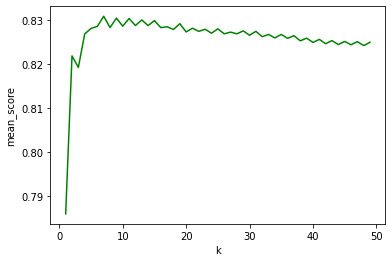

In [220]:
plt.plot(range(1,50),mean,color="green",label="mean")
plt.xlabel('k')
plt.ylabel('mean_score')

Text(0, 0.5, 'mean_score')

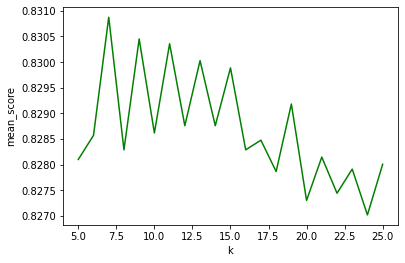

In [239]:
plt.plot(range(5,26),mean[4:25],color="green",label="mean")
plt.xlabel('k')
plt.ylabel('mean_score')

Text(0, 0.5, 'std_score')

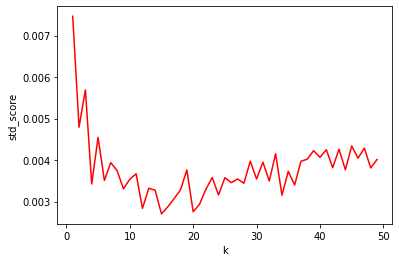

In [241]:
plt.plot(range(1,50),std,color="red",label="std")
plt.xlabel('k')
plt.ylabel('std_score')

Text(0, 0.5, 'std_score')

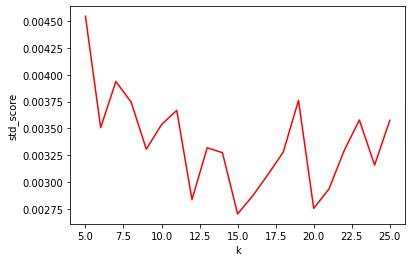

In [240]:
plt.plot(range(5,26),std[4:25],color="red",label="std")
plt.xlabel('k')
plt.ylabel('std_score')

In [ ]:
#hence let k=7

####*Fitting model*

In [246]:
clf=knn(n_neighbors=7)
clf.fit(train_scaledx,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [247]:
clf.score(train_scaledx,train_y)

0.8518274922484262

####*Testing*

In [248]:
clf.score(test_scaledx,test_y)

0.8334272829763247

In [338]:
print("accuracy")
print("train=", acc(predictions_train_knn,train_y)*100)
print("test=", acc(predictions_test_knn,test_y)*100)

accuracy
train= 85.18274922484262
test= 83.34272829763248


In [250]:
predictions_train_knn=clf.predict(train_scaledx)
predictions_test_knn=clf.predict(test_scaledx)

###**Decision Tree**

In [251]:
from sklearn.tree import DecisionTreeClassifier as dtc

####*Cross Validation*

In [255]:
list1=cvs(dtc(max_depth=7),X=train_x,y=train_y,cv=10)
list1

array([0.85345233, 0.85439173, 0.8501644 , 0.86143729, 0.85767966,
       0.84781588, 0.85244361, 0.85385338, 0.85103383, 0.85667293])

In [260]:
def val_score(h):
  mean=[]
  std=[]
  for i in range(1,h):
    score=cvs(dtc(max_depth=i,random_state=10),X=train_x,y=train_y,cv=10)  ##return list of scores
    mean.append(score.mean())
    std.append(score.std())
  return mean,std

In [262]:
mean,std=val_score(50)

Text(0.5, 1.0, 'VALIDATION SET SCORE')

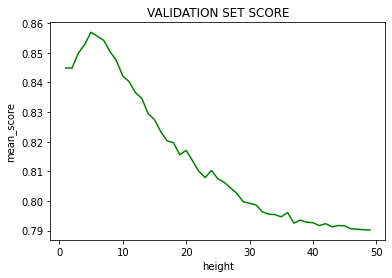

In [276]:
plt.plot(range(1,50),mean,color="green",label="mean")
plt.xlabel('height')
plt.ylabel('mean_score')
plt.title("VALIDATION SET SCORE")

Text(0, 0.5, 'std_score')

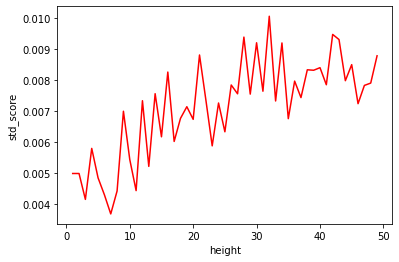

In [264]:
plt.plot(range(1,50),std,color="red",label="std")
plt.xlabel('height')
plt.ylabel('std_score')

In [ ]:
#keep depth=7

####*Fitting model*

In [283]:
dt=dtc(max_depth=7,random_state=10)

In [284]:
dt.fit(train_x,train_y)
dt.score(train_x,train_y)

0.8756459644836982

####*Testing*

In [274]:
dt.score(test_x,test_y)

0.8554114994363021

In [337]:
print("accuracy")
print("train=", acc(predictions_train_dt,train_y)*100)
print("test=", acc(predictions_test_dt,test_y)*100)

accuracy
train= 87.56459644836983
test= 85.54114994363022


In [275]:
predictions_train_dt=dt.predict(train_x)
predictions_test_dt=dt.predict(test_x)

###**Random Forest**

In [277]:
from sklearn.ensemble import RandomForestClassifier as rfc 

####*Cross Validation*

In [294]:
list1=cvs(rfc(max_depth=7),X=train_x,y=train_y,cv=10)
list1

array([0.85674025, 0.85392203, 0.86378581, 0.86707374, 0.85674025,
       0.84546736, 0.85197368, 0.85479323, 0.86043233, 0.85855263])

In [295]:
def val_score(h):
  mean=[]
  std=[]
  for i in range(1,h):
    score=cvs(rfc(max_depth=i,random_state=10),X=train_x,y=train_y,cv=10)  ##return list of scores
    mean.append(score.mean())
    std.append(score.std())
  return mean,std

In [296]:
mean,std=val_score(30)

Text(0.5, 1.0, 'VALIDATION SET SCORE')

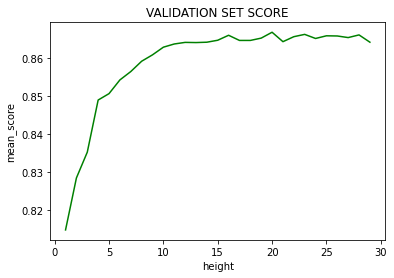

In [298]:
plt.plot(range(1,30),mean,color="green",label="mean")
plt.xlabel('height')
plt.ylabel('mean_score')
plt.title("VALIDATION SET SCORE")

Text(0, 0.5, 'std_score')

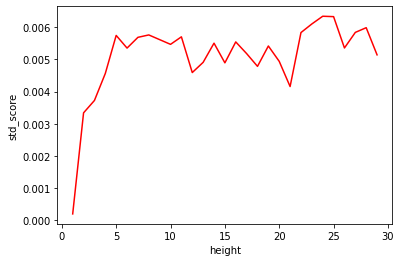

In [299]:
plt.plot(range(1,30),std,color="red",label="std")
plt.xlabel('height')
plt.ylabel('std_score')

In [ ]:
#keep depth=15

####*Fitting model*

In [309]:
rf=rfc(max_depth=15,random_state=10)
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [310]:
rf.score(train_x,train_y)

0.9490275298318144

####*Testing*

In [311]:
rf.score(test_x,test_y)

0.8638669673055243

In [336]:
print("accuracy")
print("train=", acc(predictions_train_rf,train_y)*100)
print("test=", acc(predictions_test_rf,test_y)*100)

accuracy
train= 94.90275298318144
test= 86.38669673055243


In [312]:
predictions_train_rf=rf.predict(train_x)
predictions_test_rf=rf.predict(test_x)

##**Ensembling Models and final prediction**

####*Calculating mode*

#####Training predictions

In [323]:
from statistics import mode
final_pred_train=np.array([])
for i in range(0,len(train_x)):
  final_pred_train=np.append(final_pred_train,mode([predictions_train_rf[i],predictions_train_rf[i],predictions_train_dt[i],predictions_train_knn[i],predictions_train_lr[i]]))

#####Testing predictions

In [324]:
from statistics import mode
final_pred_test=np.array([])
for i in range(0,len(test_x)):
  final_pred_test=np.append(final_pred_test,mode([predictions_test_rf[i],predictions_test_dt[i],predictions_test_knn[i],predictions_test_lr[i],predictions_test_rf[i]]))

####*Final score*

In [316]:
from sklearn.metrics import accuracy_score as acc

In [333]:
print("F1 score")
print("train=", f1(final_pred_train,train_y)*100)
print("test=", f1(final_pred_test,test_y)*100)

F1 score
train= 70.38889785380023
test= 52.22112537018756


In [331]:
print("accuracy")
print("train=", acc(final_pred_train,train_y)*100)
print("test=", acc(final_pred_test,test_y)*100)

accuracy
train= 91.37931034482759
test= 86.35851183765502


##**Summary**

In [343]:
final=pd.DataFrame(index=['Train','Test'])
final['Logistic Regression']=[acc(predictions_train_lr,train_y)*100,acc(predictions_test_lr,test_y)*100]
final['KNN']=[acc(predictions_train_knn,train_y)*100,acc(predictions_test_knn,test_y)*100]
final['Decision Tree']=[acc(predictions_train_dt,train_y)*100,acc(predictions_test_dt,test_y)*100]
final['Random Forest']=[acc(predictions_train_rf,train_y)*100,acc(predictions_test_rf,test_y)*100]
final['Ensembled Model']=[acc(final_pred_train,train_y)*100,acc(final_pred_test,test_y)*100]
final

,Logistic Regression,KNN,Decision Tree,Random Forest,Ensembled Model
Train,85.666635,85.182749,87.564596,94.902753,91.379310
Test,85.569335,83.342728,85.541150,86.386697,86.358512
